In [ ]:
from sklearn.datasets import fetch_mldata

from sklearn.model_selection import train_test_split

import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as plt

import time

from sklearn.preprocessing import MinMaxScaler

In [2]:
mnist = fetch_mldata('MNIST original')

mnist

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
mnist = fetch_mldata('MNIST original')

C:\dev\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
(train_data, test_data, train_labels, test_labels) = train_test_split(np.array(mnist.data), mnist.target,
                                                                     test_size=0.25, random_state=1234)

print(len(train_data))
print(len(test_data))

52500
17500


In [ ]:
# train_data = 52500
# test_data = 17500


In [7]:
print(np.unique(train_labels)) # train셋으로 나누었을때 빈값이 있는지 판단하는 것

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [8]:
unique, counts = np.unique(train_labels, return_counts = True)
print(np.asarray((unique,counts)).T)

[[0.000e+00 5.166e+03]
 [1.000e+00 5.894e+03]
 [2.000e+00 5.282e+03]
 [3.000e+00 5.280e+03]
 [4.000e+00 5.131e+03]
 [5.000e+00 4.743e+03]
 [6.000e+00 5.171e+03]
 [7.000e+00 5.502e+03]
 [8.000e+00 5.154e+03]
 [9.000e+00 5.177e+03]]


In [10]:
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

# 이미지를 28*28로 가용하게 된다리, 정확하게 feature 부분이 동일해야함

(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

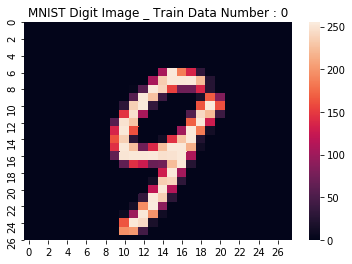

In [14]:
# 보고자하는 데이터의 인덱스
idx = 0
image_data = train_data[idx]

# 1차원으로 되어있기 때문에 1차원 길이값 및 2차원 길이값 확인
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size))) #heatmap depth로 진하기를 확인할 수 있음
plt.title(str('MNIST Digit Image _ Train Data Number : ')+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

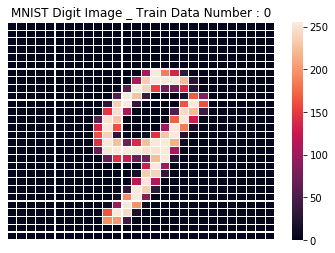

In [116]:
idx = 0
image_data = train_data[idx]
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0.1, xticklabels=False, yticklabels=False)
plt.title(str('MNIST Digit Image _ Train Data Number : ')+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

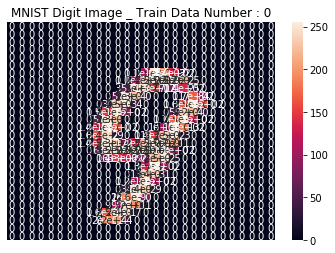

In [16]:
sns.heatmap(np.reshape(image_data, (one_size, one_size)),
            linewidth=0, xticklabels=False, yticklabels=False, annot=True)
plt.title(str('MNIST Digit Image _ Train Data Number : ')+str(idx))

In [ ]:
# 갯수를 좀 줄여야됨 = 힘들다리

# Normalization - Max/min method
# new x= (x-x_min) / (x_max - x_min)

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)

In [ ]:
# n_jobs : int, optional (default = 1)
# n_jobs = -1
# 하드웨어머신에 최대코어수만큼 돌려줌

In [2]:
import time
from sklearn.neighbors import KNeighborsClassifier   # sklearn.neighbors kn분류모델
from sklearn.metrics import accuracy_score          # 단순 정확도만 확인
from sklearn.model_selection import cross_val_score

In [124]:
t1 = time.time()
#모델세팅
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# fitting the model 
knn.fit(train_data, train_labels)

pred = knn.predict(test_data)

t2 = time.time()
print("Process Time : " + str(t2-t1))

print(accuracy_score(test_labels, pred))

Process Time : 209.21977138519287
0.9718857142857142


In [126]:
t1 = time.time()
#모델세팅

myList = list(range(1,50))

neighbors = filter(lambda x: x%2!=0, myList)

# empty ist that will hold cv scores

cv_scores = []

# cv 10 내부로 나눈 걸 cv 갯수(10), 평가기준표 accuracy
for k in neighbors :
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, train_data, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(scores.mean())

# changing to misclassification error
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d"%optimal_k)


plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mislassification Error')
plt.show()

t2 = time.time()
print("Process Time : " + str(t2-t1))

#print(accuracy_score(test_labels, pred))

0.9712186538205725
0.9714660951214116
0.9701332546666194
0.9691615104010239


KeyboardInterrupt: 

In [4]:
from sklearn.decomposition import PCA

In [128]:
num_comp = 40 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [129]:
np.sum(pca.explained_variance_ratio_)

0.7869847730264267

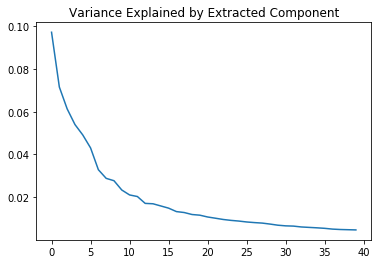

In [131]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Component')
plt.show()

In [133]:
train_ext = pca.fit_transform(train_data) # 훈련셋에는 fit으로 잘라서 바로 훈련하는 내용임
print(train_ext.shape)

(52500, 40)


In [134]:
test_ext = pca.transform(test_data) # test에는 훈련하지 않으니까 fit 하지 않음
print(test_ext.shape)

(17500, 40)


In [136]:
min_max_scaler = MinMaxScaler()

In [138]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [139]:
knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [140]:
cross_val_score(knn,train_norm, train_labels,cv=5)

array([0.97191813, 0.97152923, 0.97114011, 0.97332825, 0.96941692])

In [5]:
num_comp = 25 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

train_ext = pca.fit_transform(train_data) # 훈련셋에는 fit으로 잘라서 바로 훈련하는 내용임
print(train_ext.shape)

test_ext = pca.transform(test_data) # test에는 훈련하지 않으니까 fit 하지 않음
print(test_ext.shape)

min_max_scaler = MinMaxScaler()

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

cross_val_score(knn,train_norm, train_labels,cv=5)

NameError: name 'train_data' is not defined

In [142]:
num_comp = 10 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

train_ext = pca.fit_transform(train_data) # 훈련셋에는 fit으로 잘라서 바로 훈련하는 내용임
print(train_ext.shape)

test_ext = pca.transform(test_data) # test에는 훈련하지 않으니까 fit 하지 않음
print(test_ext.shape)

min_max_scaler = MinMaxScaler()

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

cross_val_score(knn,train_norm, train_labels,cv=5)

(52500, 10)
(17500, 10)


array([0.92670157, 0.92963245, 0.92675493, 0.92760526, 0.92358994])